In [1]:
import pandas as pd
from config import *
import matplotlib.pyplot as plt
import re,zhconv,jieba
import numpy as np

In [2]:
def traditional_2_simplified(sentence):
    '''
    将sentence中的繁体字转为简体字
    :param sentence: 待转换的句子
    :return: 将句子中繁体字转换为简体字之后的句子
    '''
    sentence = clean_sentence(sentence)
    return zhconv.convert(sentence, 'zh-cn')

def clean_sentence(sentence):
    '''
    特殊符号去除,汉语标点符号就不去掉了
    :param sentence: 待处理的字符串
    :return: 过滤特殊字符后的字符串
    '''
    if isinstance(sentence, str):
        return re.sub(
            r'[\|\/\[\]\{\}_^*(+\"\')\n]+|[；，。.:：+——(),%【】“”@#￥……&*（）]+',
            '', sentence)
    else:
        return ''

def sentence_seg(sentence):
    '''
    预处理模块
    :param sentence:待处理字符串
    :return: 处理后的字符串
    '''
    words = jieba.lcut(sentence)
    return ' '.join(words)

def transform_char(sentence):
    '''
    把句子拆分为字，为字向量模型做准备
    '''
    return ' '.join(list(sentence.strip()))

In [3]:
# 读取数据集
train_df = pd.read_csv(trainset_path)
valid_df = pd.read_csv(validset_path)
print("train dataset size : {}, valid dataset size : {}".format(train_df.shape,valid_df.shape))

train dataset size : (105000, 22), valid dataset size : (15000, 22)


In [4]:
# 查看缺失值情况
train_df.isnull().sum()

id                                          0
content                                     0
location_traffic_convenience                0
location_distance_from_business_district    0
location_easy_to_find                       0
service_wait_time                           0
service_waiters_attitude                    0
service_parking_convenience                 0
service_serving_speed                       0
price_level                                 0
price_cost_effective                        0
price_discount                              0
environment_decoration                      0
environment_noise                           0
environment_space                           0
environment_cleaness                        0
dish_portion                                0
dish_taste                                  0
dish_look                                   0
dish_recommendation                         0
others_overall_experience                   0
others_willing_to_consume_again   

In [5]:
valid_df.isnull().sum()

id                                          0
content                                     0
location_traffic_convenience                0
location_distance_from_business_district    0
location_easy_to_find                       0
service_wait_time                           0
service_waiters_attitude                    0
service_parking_convenience                 0
service_serving_speed                       0
price_level                                 0
price_cost_effective                        0
price_discount                              0
environment_decoration                      0
environment_noise                           0
environment_space                           0
environment_cleaness                        0
dish_portion                                0
dish_taste                                  0
dish_look                                   0
dish_recommendation                         0
others_overall_experience                   0
others_willing_to_consume_again   

In [6]:
# 把数据集中的繁体转化为简体。

train_df['content'] = train_df['content'].apply(traditional_2_simplified)
valid_df['content'] = valid_df['content'].apply(traditional_2_simplified)

In [7]:
# 对数据集进行分词。

train_df['content_seg'] = train_df['content'].apply(sentence_seg)
valid_df['content_seg'] = valid_df['content'].apply(sentence_seg)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.562 seconds.
Prefix dict has been built succesfully.


In [8]:
# 把评论内容拆分为字，为训练字向量模型做准备。

train_df['content_char'] = train_df['content'].apply(transform_char)
valid_df['content_char'] = valid_df['content'].apply(transform_char)

In [9]:
train_df['content_seg'].head()

0    吼吼 吼萌 死 人 的 棒棒糖 中 了 大众 点评 的 霸王餐 太 可爱 了 一直 就 好奇...
1    第三次 参加 大众 点评 网 霸王餐 的 活动 这家 店 给 人 整体 感觉 一般 首先 环...
2    4 人 同行   点 了 10 个 小吃 榴莲 酥   榴莲 味道 不足   松软   奶味...
3    之前 评价 了 莫名其妙 被删   果断 继续 差评 ！   换 了 菜单   价格 更 低...
4    出乎意料 地 惊艳 椰子 鸡 清热 降火 美容 养颜 大大 满足 了 爱 吃火锅 怕 上 火...
Name: content_seg, dtype: object

In [10]:
train_df['content_char'].head()

0    吼 吼 吼 萌 死 人 的 棒 棒 糖 中 了 大 众 点 评 的 霸 王 餐 太 可 爱 ...
1    第 三 次 参 加 大 众 点 评 网 霸 王 餐 的 活 动 这 家 店 给 人 整 体 ...
2    4 人 同 行   点 了 1 0 个 小 吃 榴 莲 酥   榴 莲 味 道 不 足   ...
3    之 前 评 价 了 莫 名 其 妙 被 删   果 断 继 续 差 评 ！   换 了 菜 ...
4    出 乎 意 料 地 惊 艳 椰 子 鸡 清 热 降 火 美 容 养 颜 大 大 满 足 了 ...
Name: content_char, dtype: object

In [11]:
# 统计点评内容的长度，用来确定输入的最大长度。

train_df['word_len'] = train_df['content_seg'].apply(lambda x: x.count(' ') + 1)
valid_df['word_len'] = valid_df['content_seg'].apply(lambda x: x.count(' ') + 1)

In [12]:
# 观察内容长度的分布。

merged_len_word = pd.concat([train_df[['word_len']],valid_df[['word_len']]],axis=0)

/home/msg/.conda/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


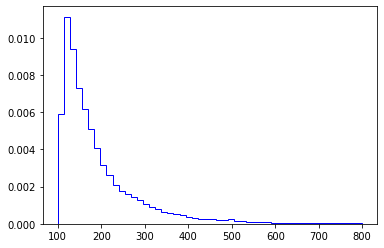

In [13]:
plt.hist(merged_len_word['word_len'],
         bins=50,
         range=(100,800),
         color='blue',
         cumulative=False,
         normed=True,
         histtype='step')
plt.show()

In [14]:
# 同样，观察拆分后字后的点评内容的长度。

train_df['char_len'] = train_df['content_char'].apply(lambda x: x.count(' ') + 1)
valid_df['char_len'] = valid_df['content_char'].apply(lambda x: x.count(' ') + 1)

In [15]:
merged_len_char = pd.concat([train_df[['char_len']],valid_df[['char_len']]],axis=0)

/home/msg/.conda/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


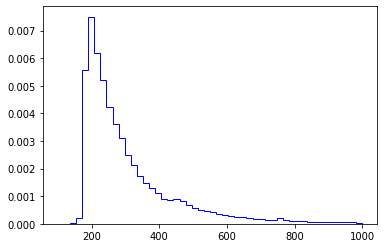

In [16]:
plt.clf()

plt.hist(merged_len_char['char_len'],
         bins=50,
         range=(100,1000),
         color='blue',
         cumulative=False,
         normed=True,
         histtype='step')
plt.show()

In [17]:
# 可以发现，对于分词后的内容，模型最大输入长度取350，那么有92%的样本不需要截断。
# 这个值我们尽可能取大一点，因为后面我们可以作为参数来调，比如从200,250,300,350.

bool_ = merged_len_word['word_len'] <= 400
bool_ = bool_.apply(lambda x:int(x))
round(sum(bool_) / len(bool_),4)

0.9488

In [18]:
# 可以发现，对于拆字后的内容，模型最大输入长度取512，那么有90%的样本不需要截断。

bool_ = merged_len_char['char_len'] <= 800
bool_ = bool_.apply(lambda x:int(x))
round(sum(bool_) / len(bool_),4)

0.9762

In [19]:
# 所以暂时考虑词的max_len为350，而字的max_len取512

In [20]:
# 对评论内容按字进行排序，以便于按 batch 进行分桶，每个batch的输入长度不同，尽量减少pad。

train_df.sort_values('word_len',inplace=True)
valid_df.sort_values('word_len',inplace=True)

In [21]:
train_df.tail()

,id,content,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,...,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again,content_seg,content_char,word_len,char_len
103665,103665,早上灵隐寺烧完香回来已经11点了大家已经饿到前胸贴后背了所以门口直接拦了TAXI到杭州酒家幸...,-2,-2,-2,-2,-2,-2,-2,-1,...,-1,0,-2,-2,0,-2,早上 灵隐寺 烧 完香 回来 已经 11 点 了 大家 已经 饿到 前胸 贴 后背 了 所以...,早 上 灵 隐 寺 烧 完 香 回 来 已 经 1 1 点 了 大 家 已 经 饿 到 前 ...,1970,2266
75330,75330,走进这家店感觉有点像万岁 ...,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,1,-2,-2,1,-2,走进 这家 店 感觉 有点像 万岁 ...,走 进 这 家 店 感 觉 有 点 像 万 岁 ...,1990,2040
40592,40592,被抽中的免费试吃100元的海鲜料理任选 ...,-2,-2,-2,-2,1,-2,-2,1,...,-2,1,-2,-2,1,1,被 抽 中 的 免费 试吃 100 元 的 海鲜 料理 任选 ...,被 抽 中 的 免 费 试 吃 1 0 0 元 的 海 鲜 料 理 任 选 ...,2001,2107
73979,73979,今天同事生日想了N天还是觉得蝴蝶轩比较落实 ...,-2,-2,-2,-2,-2,-2,-2,-1,...,-2,0,-2,-2,1,-2,今天 同事 生日 想 了 N 天 还是 觉得 蝴蝶 轩 比较 落实 ...,今 天 同 事 生 日 想 了 N 天 还 是 觉 得 蝴 蝶 轩 比 较 落 实 ...,2310,2436
73297,73297,无锡王兴记成立于一九一三年老字号是全国首批中华餐饮名店因其历史悠久、信誉卓著、特色鲜明、质量...,1,-2,-2,-2,-2,-2,-2,-2,...,-2,1,-2,-2,1,-2,无锡 王兴记 成立 于 一 九一三 年 老字号 是 全国 首批 中华 餐饮 名店 因 其 历...,无 锡 王 兴 记 成 立 于 一 九 一 三 年 老 字 号 是 全 国 首 批 中 华 ...,2754,2996


In [22]:
train_df.dropna(inplace=True)
valid_df.dropna(inplace=True)

In [23]:
print("train dataset size : {}, valid dataset size : {}".format(train_df.shape,valid_df.shape))

train dataset size : (105000, 26), valid dataset size : (15000, 26)


In [24]:
train_df.to_csv(trainset_proc_path,sep=',',header=True,index=None)
valid_df.to_csv(validset_proc_path,sep=',',header=True,index=None) 

In [25]:
# 统计类别不平衡情况
import sys
sys.path.append('../utils')
from config import tag_columns

In [26]:
tag_columns

['location_traffic_convenience',
 'location_distance_from_business_district',
 'location_easy_to_find',
 'service_wait_time',
 'service_waiters_attitude',
 'service_parking_convenience',
 'service_serving_speed',
 'price_level',
 'price_cost_effective',
 'price_discount',
 'environment_decoration',
 'environment_noise',
 'environment_space',
 'environment_cleaness',
 'dish_portion',
 'dish_taste',
 'dish_look',
 'dish_recommendation',
 'others_overall_experience',
 'others_willing_to_consume_again']

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [28]:
def class_count(df):
    df_one_hot = pd.get_dummies(df)[[-2, -1, 0, 1]].values
    df_label = np.argmax(df_one_hot,1)
    class_freqs = np.bincount(df_label)
    return class_freqs

def visualize_freqs(df,tag):
    x = [-2,-1,0,1]
    freq = class_count(df[tag])
    plt.bar(range(4),freq,width=0.5,color=['r','b','y','g'],label=tag)
    plt.xticks(range(4),[-2,-1,0,1] )
    plt.grid()
    plt.legend()
    plt.show()
    plt.clf()

In [29]:
Location_tags = [tag for tag in tag_columns if 'location' in tag]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


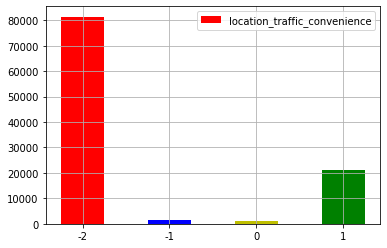

<Figure size 432x288 with 0 Axes>

In [30]:
visualize_freqs(train_df,Location_tags[0])

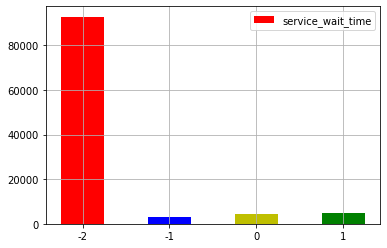

<Figure size 432x288 with 0 Axes>

In [31]:
Service_tags = [tag for tag in tag_columns if 'service' in tag]
visualize_freqs(train_df,Service_tags[0])

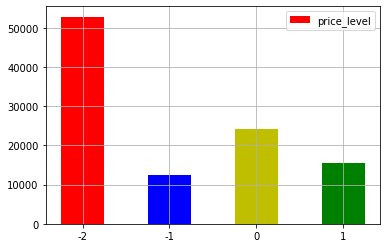

<Figure size 432x288 with 0 Axes>

In [32]:
Price_tags = [tag for tag in tag_columns if 'price' in tag]
visualize_freqs(train_df,Price_tags[0])

In [ ]:
# 从部分图可以看到，类别不平衡问题非常严重，考虑用代价敏感学习来解决
# 某类别的loss权重 = 全部样本数/某类别样本数 ，在计算交叉熵损失时，每个类别的loss乘以其权重，可以对不平衡类别的loss加大惩罚力度。